In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
from statsmodels.stats.multitest import fdrcorrection
from statsmodels.stats.contingency_tables import cochrans_q
import os

## Plotting usage concordance between two datasets

In [27]:
root = "TCR_usages"

In [28]:
tra_df = pd.read_csv("TargSeq_TRA_all_df.csv")
trb_df = pd.read_csv("TargSeq_TRB_all_df.csv")
tra_df = tra_df[[x for x in tra_df.columns if x.startswith("TR")]]
trb_df = trb_df[[x for x in trb_df.columns if x.startswith("TR")]]
tra_df = tra_df.mean().to_frame("targseq_mean")
trb_df = trb_df.mean().to_frame("targseq_mean")
targseq_df = pd.concat([tra_df, trb_df])

sharon_df = pd.read_csv("sharon_allVDJRatios_table.csv")
sharon_df = sharon_df[[x for x in sharon_df.columns if x.startswith("TR")]]
sharon_df = sharon_df.mean().to_frame("sharon_mean")

sharon_counts_df = pd.read_csv("gene_counts.tsv", delimiter="\t")
sharon_counts_df = sharon_counts_df.transpose()
sharon_counts_df = sharon_counts_df[[x for x in sharon_counts_df.columns if x.startswith("TR")]]
sharon_counts_mean_df = sharon_counts_df.mean().to_frame("sharon_counts_mean")
sharon_counts_std_df = sharon_counts_df.std().to_frame("sharon_counts_std")

dgn_df = pd.read_csv("DGN_family_usage_table.csv", index_col=0)
dgn_df = dgn_df[[x for x in dgn_df.columns if x.startswith("TR")]]
dgn_df = dgn_df.mean().to_frame("dgn_mean")

dgn_counts_df = pd.read_csv("DGN_family_counts_table.csv", index_col=0)
dgn_counts_df = dgn_counts_df[[x for x in dgn_counts_df.columns if x.startswith("TR")]]
dgn_counts_mean_df = dgn_counts_df.mean().to_frame("blast_counts_mean")
dgn_counts_std_df = dgn_counts_df.std().to_frame("blast_counts_std")

liblau_cd4_df = pd.read_csv("liblau_usage_ratios_cd4_wide.csv")
liblau_cd4_df = liblau_cd4_df.mean().to_frame("liblau_mean")

merged_mean_df = pd.merge(sharon_df, dgn_df, left_index=True, right_index=True, how="inner").fillna(0.0)
merged_std_df = pd.merge(sharon_counts_std_df, dgn_counts_std_df, left_index=True, right_index=True, how="inner").fillna(0.0)

merged_df =  pd.merge(merged_mean_df, merged_std_df, left_index=True, right_index=True, how="inner").fillna(0.0)
merged_df = merged_df.reset_index().rename(columns={"index":"TCR"})
merged_df['segment'] = merged_df['TCR'].str.slice(start=0, stop=4)

dataset1_name, dataset2_name = merged_df.columns[1], merged_df.columns[2]

In [22]:
merged_counts_df

,TRAC,TRAJ1_sharon,TRAJ10_sharon,TRAJ11_sharon,TRAJ12_sharon,TRAJ13_sharon,TRAJ15_sharon,TRAJ16_sharon,TRAJ17_sharon,TRAJ18_sharon,...,TRBV6-9,TRBV7-1_blast,TRBV7-2,TRBV7-3_blast,TRBV7-4_blast,TRBV7-6_blast,TRBV7-7_blast,TRBV7-8_blast,TRBV7-9,TRBV9_blast
LD0001,28047,7,41,16,36,40,15,25,21,37,...,0.000000,1.0,579.280642,192.950772,13.708061,73.333462,35.824113,163.368755,500.406673,216.0
LD0002,39020,8,53,16,53,63,34,8,34,50,...,3.328991,10.0,718.796944,348.679751,11.623974,134.121330,43.637500,260.887028,812.232774,418.0
LD0003,28044,10,66,22,35,34,26,22,30,26,...,4.836033,4.0,543.000479,75.012371,21.428571,92.939655,46.999076,158.937881,643.518096,312.0
LD0006,35154,4,37,18,47,51,26,30,32,49,...,4.966136,3.0,891.826568,188.382356,45.077445,106.658080,25.010667,229.158287,685.155813,243.0
LD0007,40934,6,68,27,44,51,46,24,44,54,...,1.587156,11.0,1289.304814,226.432604,21.271820,124.061459,23.074082,250.416973,890.468070,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LD1357,25508,2,30,18,26,52,19,17,19,23,...,1.669610,2.0,657.025083,224.896622,10.364078,106.837398,30.620229,171.382299,446.529618,318.0
LD1361,39323,13,63,36,35,64,37,23,32,42,...,10.387460,26.0,880.597586,261.898966,15.598802,151.365441,31.853473,324.272856,1072.856625,325.0
LD1362,47095,13,59,31,22,61,17,25,27,54,...,2.410991,3.0,400.048265,127.228804,12.695122,87.023072,16.586317,182.279602,730.034108,201.0
LD1364,60857,12,89,29,60,66,56,28,95,69,...,5.881105,10.0,1117.993199,144.481487,18.603093,143.247012,141.012887,340.709617,837.534146,400.0


## Correlation between BLAST and Sharon counts

TRBV6-8 0.2245863869305105
TRBV12-1 0.26726546853495153
TRBV5-7 0.2990838203581627
TRBV12-2 0.39707202698674404
TRBV4-2 0.4200591092499555
TRBV5-3 0.43480064554964715
TRAJ37 0.5015239842871788
TRBV7-1 0.5478544198825526
TRAJ36 0.6717917517679084
TRAJ15 0.7679131194404261
TRAJ16 0.7699690297634033
TRAJ7 0.7770108674274444
TRAJ11 0.7791689369238175
TRAJ35 0.7838086782278479
TRAJ21 0.7842986851078063
TRAJ26 0.8018113263775394
TRBV7-3 0.8019012117298238
TRAJ47 0.8033115436805787
TRBV7-7 0.8034805193353944
TRAJ38 0.8044082235353711
TRAJ50 0.8067240684052032
TRAJ1 0.8077919028595203
TRAJ29 0.8096066561064575
TRAJ32 0.8144095258729372
TRAJ56 0.8151990641267294
TRAJ58 0.8173069123512393
TRAJ23 0.8177700927679227
TRAJ22 0.8203577108188839
TRBV7-8 0.8220512779986433
TRBJ2-6 0.8224374940278955
TRAJ18 0.8228637120381996
TRAJ12 0.8232907447984852
TRAJ24 0.8241054285228725
TRAJ43 0.8264186039520829
TRAJ27 0.8270709949531587
TRAJ41 0.8287911931724787
TRAJ40 0.8289397005015284
TRBJ2-5 0.82936711282274

,TCR,sharon_mean,dgn_mean,sharon_counts_std,blast_counts_std,segment,abs_diff
93,TRBJ2-3,0.267234,0.157145,392.783896,224.176717,TRBJ,0.110089
97,TRBJ2-7,0.217689,0.133872,352.493754,203.153009,TRBJ,0.083817
90,TRBJ2-1,0.200934,0.151320,327.234128,227.983956,TRBJ,0.049614
104,TRBV19,0.085560,0.043856,543.303330,315.633545,TRBV,0.041703
92,TRBJ2-2P,0.057520,0.023089,92.272827,36.630299,TRBJ,0.034431


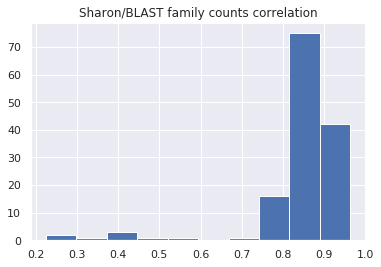

In [30]:
common_families = set(sharon_counts_df.columns).intersection(set(dgn_counts_df.columns))

merged_counts_df = pd.merge(sharon_counts_df, dgn_counts_df, left_index=True, right_index=True, how="inner", suffixes=("_sharon", "_blast"))

family_corr_dict = dict()
for family in common_families:
#    fig, ax = plt.subplots(figsize=(20,10))
    sharon_counts = merged_counts_df['{}_sharon'.format(family)]
    blast_counts = merged_counts_df['{}_blast'.format(family)]
    r, p = stats.pearsonr(sharon_counts, blast_counts)
    family_corr_dict[family] = r
#     plt.title("{}, Pearson's R: {:4f} (p={:4f})".format(family, r, p))
#     plt.plot(range(len(merged_counts_df)), sharon_counts-sharon_counts.mean(), label="sharon - mean(sharon)")
#     plt.plot(range(len(merged_counts_df)), blast_counts-blast_counts.mean(), label="blast - mean(blast)")
#     plt.legend()
#     plt.savefig("{}_sharon_blast_counts_corr.png".format(family.split("/")[0]))

for x in sorted(family_corr_dict, key=lambda x: family_corr_dict[x]):
    print(x, family_corr_dict[x])

plt.hist(family_corr_dict.values())
plt.title("Sharon/BLAST family counts correlation")

merged_df['abs_diff'] = abs(merged_df[dataset1_name] - merged_df[dataset2_name])

merged_df.sort_values('abs_diff', ascending=False).head()

In [31]:
#res = cochrans_q(merged_df[['targseq_mean', 'dgn_mean']].values)

## Scatterplot

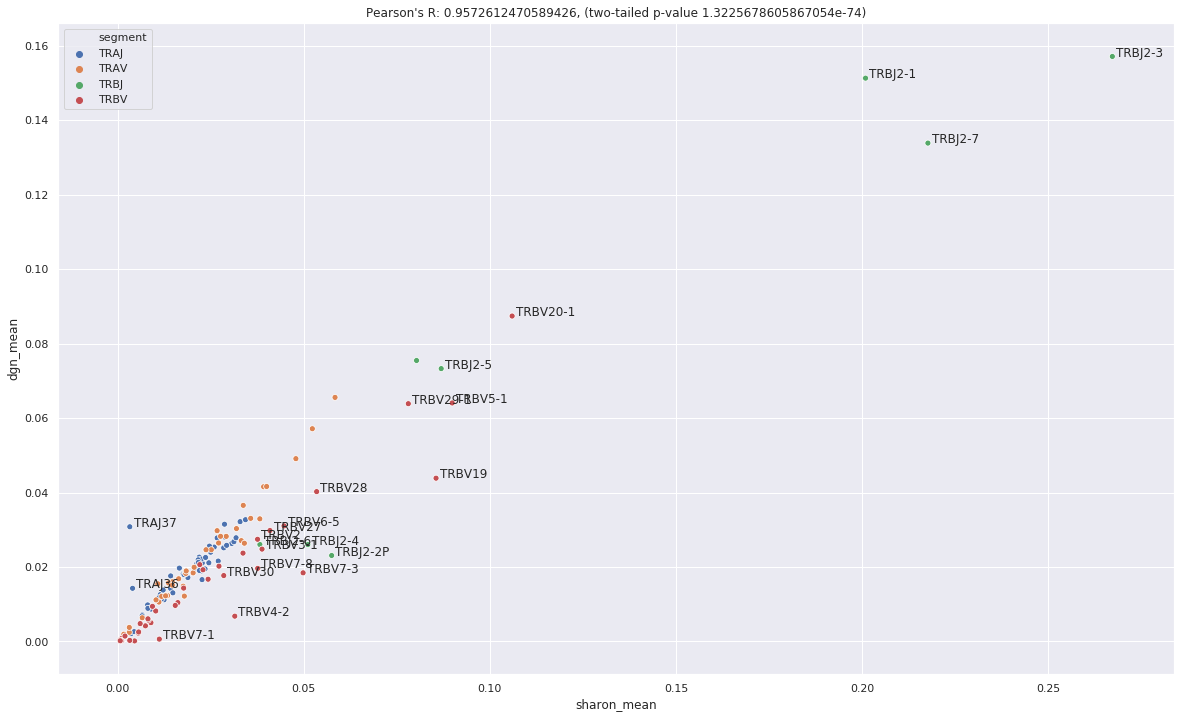

In [33]:
segment = "" # change this flag for different plots
plot_df = merged_df
if segment:
    plot_df = merged_df[merged_df['segment']==segment] # comment this out to get all segments

r, p = scipy.stats.pearsonr(plot_df[dataset1_name], plot_df[dataset2_name])

sns.set()
fig, ax = plt.subplots(figsize=(20,60))
sns.scatterplot(x=dataset1_name, y=dataset2_name, hue="segment", data=plot_df)
#plt.xlim(-0.01, 0.16)
#plt.ylim(-0.01, 0.16)

plt.xlabel(dataset1_name)
plt.ylabel(dataset2_name)
plt.title("Pearson's R: {}, (two-tailed p-value {})".format(r, p))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if abs(point['x']-point['y']) > 0.01:#70:
        # if point['x']>0.02 or point['y']>0.025:
        # if str(point['val']) in ['TRAV23/DV6', 'TRAV13-1', 'TRAV10-1', 'TRAV17']:
            ax.text(point['x']+.001, point['y'], str(point['val']))

label_point(plot_df[dataset1_name], plot_df[dataset2_name], plot_df.TCR, plt.gca())

ax.set_aspect('equal', 'box')

# ax.errorbar(plot_df[dataset1_name].values, plot_df[dataset2_name].values, yerr=0.01, xerr=0.01,
#             fmt='o', ecolor='g', capthick=2)

In [30]:
merged_df.to_csv("targseq_dgn_usage_comparison.csv", index=None)

## Plotting OLS Results

In [2]:
# from sklearn import preprocessing

# def normalize_series(series):
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(series.reshape(-1,1))
#     return x_scaled

# # normalize OLS coefficients
# all_res_df["0301_coef_targseq"] = normalize_series(all_res_df["0301_coef_targseq"].values)
# all_res_df["0301_coef_dgn"] = normalize_series(all_res_df["0301_coef_dgn"].values)

In [3]:
group_602 = "all" # all, pos, neg
dgn_res_df = pd.read_csv("dgn_res_df_0602{}.csv".format(group_602))
targseq_res_df = pd.read_csv("targseq_res_df_0602{}.csv".format(group_602))
all_res_df = pd.merge(dgn_res_df, targseq_res_df, on="TCR", how="outer", suffixes=('_dgn', '_targseq'))

In [4]:
# pd.set_option('display.max_rows', 200)
# all_res_df

/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


(158.0, 0.0)

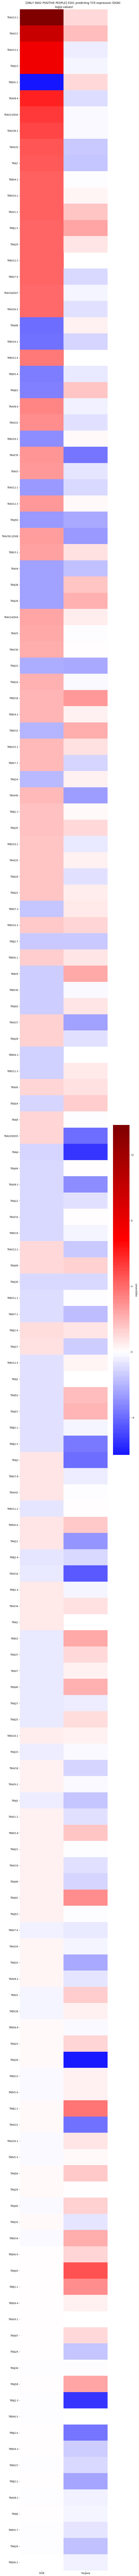

In [5]:
pvalue_mat = all_res_df[['pvalue_dgn', 'pvalue_targseq']].values
pvalue_mat = -np.log(pvalue_mat)
coefs_mat = all_res_df[['coef_dgn', 'coef_targseq']].values
tcr_columns = all_res_df['TCR'].values
#pvalue_mat = np.nan_to_num(pvalue_mat, nan=-0.1)
pvalue_mat.shape, coefs_mat.shape

-np.log(0.05/len(tcr_columns))

signed_pvalue_mat = pvalue_mat*np.where(coefs_mat>0, 1, -1)

fig, (ax1) = plt.subplots(sharex=False, sharey=True, figsize=((pvalue_mat.shape[1]//2+3)*2, (pvalue_mat.shape[0]//2)*2))
fig.tight_layout(pad=3.0)
ax1 = sns.heatmap(signed_pvalue_mat, cmap='seismic', center=0, cbar_kws={'label': "-log(pvalue)"}, ax=ax1)
fig.suptitle("[ONLY 0602 POSITIVE PEOPLE] 0301 predicting TCR expression (DGN)", y=1)
ax1.set_title("-log(p-values)")
ax1.set_yticklabels(tcr_columns, rotation=0)
ax1.set_xticklabels(['DGN', 'Targseq'])
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1, 'Targseq coefs')

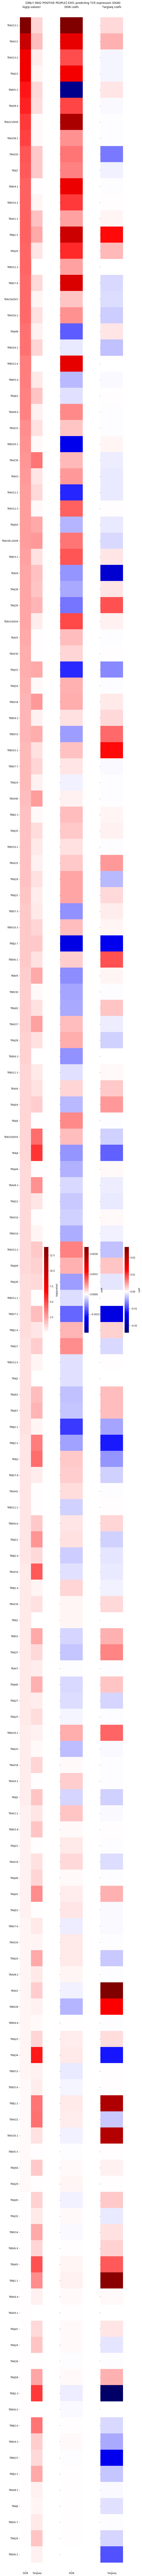

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=((pvalue_mat.shape[1]//2+3)*2, (pvalue_mat.shape[0]//2)*2))
fig.tight_layout(pad=3.0)
ax1 = sns.heatmap(pvalue_mat, cmap='seismic', center=0, cbar_kws={'label': "-log(pvalue)"}, ax=ax1)
ax2 = sns.heatmap(coefs_mat[:,None,0], cmap='seismic', center=0, cbar_kws={'label': "coef"}, ax=ax2)
ax3 = sns.heatmap(coefs_mat[:,None,1], cmap='seismic', center=0, cbar_kws={'label': "coef"}, ax=ax3)

fig.suptitle("[ONLY 0602 POSITIVE PEOPLE] 0301 predicting TCR expression (DGN)", y=1)

ax1.set_title("-log(p-values)")
ax1.set_yticklabels(tcr_columns, rotation=0)
ax1.set_xticklabels(['DGN', 'Targseq'])
ax2.set_xticklabels(['DGN'])
ax3.set_xticklabels(['Targseq'])

bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
ax2.set_ylim(bottom + 0.5, top - 0.5)
ax3.set_ylim(bottom + 0.5, top - 0.5)

ax2.set_title("DGN coefs")
ax3.set_title("Targseq coefs")

## Meta-analysis

### generate meta-analysis_0602pos, meta-analysis_0602neg, and meta-analysis_0602all

In [7]:
group_602 = "all" # all, pos, neg

In [8]:
dgn_sample_weight = 895
targseq_TRA_sample_weight = 75
TRA_total_weight = dgn_sample_weight + targseq_TRA_sample_weight
targseq_TRB_sample_weight = 59
TRB_total_weight = dgn_sample_weight + targseq_TRB_sample_weight

In [9]:
all_res_df['total_weight'] = all_res_df['TCR'].apply(lambda tcr: TRA_total_weight if tcr[2]=="A" else TRB_total_weight)

In [10]:
all_res_df['dgn_ratio'] = np.sqrt(dgn_sample_weight/all_res_df['total_weight'])
all_res_df['targseq_ratio'] = np.sqrt((all_res_df['total_weight']-dgn_sample_weight)/all_res_df['total_weight'])

In [11]:
all_res_df['dgn_zscore'] = all_res_df['coef_dgn']/all_res_df['se_dgn']
all_res_df['targseq_zscore'] = all_res_df['coef_targseq']/all_res_df['se_targseq']

In [17]:
def get_combined_zscore(row):
    if np.isnan(row['dgn_zscore']):
        return row['targseq_zscore']
    elif np.isnan(row['targseq_zscore']):
        return row['dgn_zscore']
    else:
        return row['dgn_zscore']*row['dgn_ratio'] + row['targseq_zscore']*row['targseq_ratio']

In [18]:
all_res_df['combined_zscore'] = all_res_df.apply(lambda row: get_combined_zscore(row), axis=1)
all_res_df['combined_pvalue'] = stats.norm.sf(abs(all_res_df['combined_zscore']))*2

In [19]:
all_res_df = all_res_df.sort_values("combined_pvalue", ascending=True)

In [20]:
all_res_df.to_csv("meta-analysis_0602{}.csv".format(group_602))

### Combine meta-analysis from 0602pos, 0602neg, 0602all

In [21]:
pos = pd.read_csv("meta-analysis_0602pos.csv")[['TCR','coef_dgn','pvalue_dgn','coef_targseq','pvalue_targseq','combined_pvalue']]
neg = pd.read_csv("meta-analysis_0602neg.csv")[['TCR','coef_dgn','pvalue_dgn','coef_targseq','pvalue_targseq','combined_pvalue']]
alll = pd.read_csv("meta-analysis_0602all.csv")[['TCR','coef_dgn','pvalue_dgn','coef_targseq','pvalue_targseq','combined_pvalue']]

In [22]:
together = pd.merge(pd.merge(pos, neg, on="TCR", suffixes=('_pos', '_neg')), alll, on="TCR")
together = together.rename(columns={'coef_dgn':'coef_dgn_all', 'coef_targseq':'coef_targseq_all', 'combined_pvalue':'combined_pvalue_all','pvalue_dgn':'pvalue_dgn_all', 'pvalue_targseq':'pvalue_targseq_all'})

In [23]:
# NaN due to NaN

# together["fdr_pvalue_dgn_pos"] = fdrcorrection(together["pvalue_dgn_pos"])[1]
# together["fdr_pvalue_dgn_neg"] = fdrcorrection(together["pvalue_dgn_neg"])[1]
# together["fdr_pvalue_dgn_all"] = fdrcorrection(together["pvalue_dgn_all"])[1]

# together["fdr_pvalue_targseq_pos"] = fdrcorrection(together["pvalue_targseq_pos"])[1]
# together["fdr_pvalue_targseq_neg"] = fdrcorrection(together["pvalue_targseq_neg"])[1]
# together["fdr_pvalue_targseq_all"] = fdrcorrection(together["pvalue_targseq_all"])[1]

together["combined_fdr_pvalue_pos"] = fdrcorrection(together["combined_pvalue_pos"])[1]
together["combined_fdr_pvalue_neg"] = fdrcorrection(together["combined_pvalue_neg"])[1]
together["combined_fdr_pvalue_all"] = fdrcorrection(together["combined_pvalue_all"])[1]

In [24]:
column_order = ['TCR'] + \
['coef_dgn_pos','pvalue_dgn_pos','coef_targseq_pos','pvalue_targseq_pos','combined_pvalue_pos','combined_fdr_pvalue_pos'] + \
['coef_dgn_neg','pvalue_dgn_neg','coef_targseq_neg','pvalue_targseq_neg','combined_pvalue_neg','combined_fdr_pvalue_neg'] + \
['coef_dgn_all','pvalue_dgn_all','coef_targseq_all','pvalue_targseq_all','combined_pvalue_all','combined_fdr_pvalue_all']

In [25]:
together = together[column_order]

In [26]:
### WHICH COLUMN TO SORT BY
together = together.sort_values("combined_fdr_pvalue_all")

In [27]:
### LABEL COLUMNS WITH SAMPLE SIZE
column_rename_with_sample_size = dict()
for column in together.columns:
    tokens = column.split("_")
    if "dgn" in tokens:
        new_column_name = "{} (n={})".format(column, dgn_sample_weight)
    elif "targseq" in tokens:
        new_column_name = "{} (TRA_n={}, TRB_n={})".format(column, targseq_TRA_sample_weight, targseq_TRB_sample_weight)
    elif "combined" in tokens:
        new_column_name = "{} (TRA_n={}, TRB_n={})".format(column, TRA_total_weight, TRB_total_weight)
    else:
        new_column_name = column
    column_rename_with_sample_size[column] = new_column_name

In [28]:
together = together.rename(columns=column_rename_with_sample_size)

In [29]:
together

,TCR,coef_dgn_pos (n=895),pvalue_dgn_pos (n=895),"coef_targseq_pos (TRA_n=75, TRB_n=59)","pvalue_targseq_pos (TRA_n=75, TRB_n=59)","combined_pvalue_pos (TRA_n=970, TRB_n=954)","combined_fdr_pvalue_pos (TRA_n=970, TRB_n=954)",coef_dgn_neg (n=895),pvalue_dgn_neg (n=895),"coef_targseq_neg (TRA_n=75, TRB_n=59)","pvalue_targseq_neg (TRA_n=75, TRB_n=59)","combined_pvalue_neg (TRA_n=970, TRB_n=954)","combined_fdr_pvalue_neg (TRA_n=970, TRB_n=954)",coef_dgn_all (n=895),pvalue_dgn_all (n=895),"coef_targseq_all (TRA_n=75, TRB_n=59)","pvalue_targseq_all (TRA_n=75, TRB_n=59)","combined_pvalue_all (TRA_n=970, TRB_n=954)","combined_fdr_pvalue_all (TRA_n=970, TRB_n=954)"
60,TRAV13-1,0.003855,5.051960e-05,0.001941,0.338175,2.695469e-05,0.001420,0.001595,0.256412,0.002708,0.677671,0.223521,0.783189,0.003520,9.866624e-07,0.001941,0.338175,5.475250e-07,0.000087
64,TRAV17,0.002912,2.483848e-05,0.003986,0.174443,7.604589e-06,0.000601,0.000661,0.486538,0.003680,0.469476,0.372731,0.828417,0.002084,5.034608e-05,0.003986,0.174443,1.674501e-05,0.001323
4,TRAJ13,0.001866,1.025265e-02,-0.000458,0.768238,1.675955e-02,0.214444,0.001819,0.079066,0.003834,0.476811,0.055854,0.519116,0.001905,4.877724e-04,-0.000458,0.768238,1.037047e-03,0.050839
61,TRAV13-2,0.000840,3.950540e-02,-0.000430,0.605084,6.623599e-02,0.463820,0.000402,0.633945,-0.000144,0.942170,0.662456,0.955929,0.001212,4.850607e-04,-0.000430,0.605084,1.287053e-03,0.050839
71,TRAV23/DV6,0.003132,8.972845e-08,-0.000057,0.884716,2.369601e-07,0.000037,0.007681,0.029037,-0.001573,0.193003,0.093945,0.704593,0.002913,4.962247e-03,-0.000057,0.884716,7.695075e-03,0.135091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,TRAJ32,-0.000403,4.041051e-01,-0.001079,0.533874,3.282323e-01,0.804331,0.001131,0.204808,0.006888,0.041349,0.040779,0.443227,0.000044,9.098668e-01,-0.001079,0.533874,9.467003e-01,0.971290
146,TRBV6-5,-0.000143,8.601758e-01,NaN,NaN,8.601081e-01,0.957047,0.000099,0.930089,NaN,NaN,0.930015,0.979616,-0.000033,9.562847e-01,NaN,NaN,9.562715e-01,0.974780
67,TRAV2,-0.000774,7.257597e-02,0.026143,0.247468,1.620624e-01,0.673838,-0.001566,0.025746,-0.005882,0.948950,0.029664,0.443227,-0.000103,7.640947e-01,0.026143,0.247468,9.668136e-01,0.979114
74,TRAV26-1,0.000261,7.102537e-01,0.020811,0.456870,5.703834e-01,0.876784,0.000301,0.773428,0.029783,0.458949,0.613914,0.915713,-0.000098,8.542734e-01,0.020811,0.456870,9.729168e-01,0.979114


In [28]:
together.to_csv("meta-analysis-all.csv", index=None)